In [1]:
import pandas as pd
import ast
import glob
import os
import pprint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dictionaries from the files
a_list = []
#path = '/app/src/files/'
path = '/app/Results/'
def process_your_file(file):
    f1 = open(file, 'r')
    return ast.literal_eval(f1.read())
a_list = [ process_your_file(file) for file in glob.glob(os.path.join(path, '*.txt')) ]

In [3]:
# Convert each dictionary to dataframe
df, dftt = pd.DataFrame(), pd.DataFrame()
for xd in a_list:
    dftt = df
    dft1 = {(k1, k2):v2 for k1,v1 in xd.items() 
                               for k2,v2 in xd[k1].items()
                               }
    dft2 = {(k1, k2):v2 for k1,v1 in dft1.items() 
                               for k2,v2 in dft1[k1].items()
                               }
    dft3 = {(k1, k2):v2 for k1,v1 in dft2.items() 
                               for k2,v2 in dft2[k1].items()
                               }
    dft = pd.DataFrame([dft3[i] for i in sorted(dft3)],
                  index = pd.MultiIndex.from_tuples([(k1, k2, k3, k4) for (((k1, k2),k3),k4) in dft3.keys()])
                 )   
    dft.sort_index()
    dft = dft.rename_axis(['SearchTerm','Area','Salary','ZipCode'])
    df = pd.concat([dft, dftt], sort=True)
    df.fillna(0,inplace=True)
    df.sort_index()
    dft.drop
    dftt.drop
#column_list = [_ for _ in df.columns]
#column_list
df.columns = df.columns.str.lower()
df.head()

.net  bayesian  confluence  \
SearchTerm            Area        Salary ZipCode                               
data science engineer Phoenix, AZ 150000 85003    15.0     220.0         0.0   
                                         85004    15.0     220.0         0.0   
                                         85006    15.0     220.0         0.0   
                                         85007    15.0     220.0         0.0   
                                         85008    15.0     220.0         0.0   

                                                    etl  economics  elastic  \
SearchTerm            Area        Salary ZipCode                              
data science engineer Phoenix, AZ 150000 85003    228.0      132.0    127.0   
                                         85004    228.0      132.0    127.0   
                                         85006    228.0      132.0    127.0   
                                         85007    228.0      132.0    127.0   
                                         85008    228.0      132.0    127.0   

                                                  excel  jmeter  jenkins  mdm  \
SearchTerm            Area        Salary ZipCode                                
data science engineer Phoenix, AZ 150000 85003      0.0     0.0      1.0  0.0   
                                         85004      0.0     0.0      1.0  0.0   
                                         85006      0.0     0.0      1.0  0.0   
                                         85007      0.0     0.0      1.0  0.0   
                                         85008      0.0     0.0      1.0  0.0   

                                                 ...   stress  tableau  \
SearchTerm            Area        Salary ZipCode ...                     
data science engineer Phoenix, AZ 150000 85003   ...      0.0    132.0   
                                         85004   ...      0.0    132.0   
                                         85006   ...      0.0    132.0   
                                         85007   ...      0.0    132.0   
                                         85008   ...      0.0    132.0   

                                                  telecommunications    ui  \
SearchTerm            Area        Salary ZipCode                             
data science engineer Phoenix, AZ 150000 85003                   0.0  49.0   
                                         85004                   0.0  49.0   
                                         85006                   0.0  49.0   
                                         85007                   0.0  49.0   
                                         85008                   0.0  49.0   

                                                  unix  visualization  \
SearchTerm            Area        Salary ZipCode                        
data science engineer Phoenix, AZ 150000 85003     4.0          486.0   
                                         85004     4.0          486.0   
                                         85006     4.0          486.0   
                                         85007     4.0          486.0   
                                         85008     4.0          486.0   

                                                  visualizations  warehouse  \
SearchTerm            Area        Salary ZipCode                              
data science engineer Phoenix, AZ 150000 85003               0.0        4.0   
                                         85004               0.0        4.0   
                                         85006               0.0        4.0   
                                         85007               0.0        4.0   
                                         85008               0.0        4.0   

                                                  windows  xml  
SearchTerm            Area        Salary ZipCode                
data science engineer Phoenix, AZ 150000 85003        0.0  0.0  
                                        

In [4]:
# Merge duplicates and drop non-specific columns
df['visualization'] += df.pop('visualizations')
df['scripting'] += df.pop('scripts')
df['git'] +=df.pop('github')
df['api'] +=df.pop('apis')
#df['Machine'] +=df.pop('learning')
#df.rename(columns={'Machine': 'MachineLearning'}, inplace=True)
df.rename(columns={'big': 'big data'}, inplace=True)
df.columns = df.columns.str.capitalize()

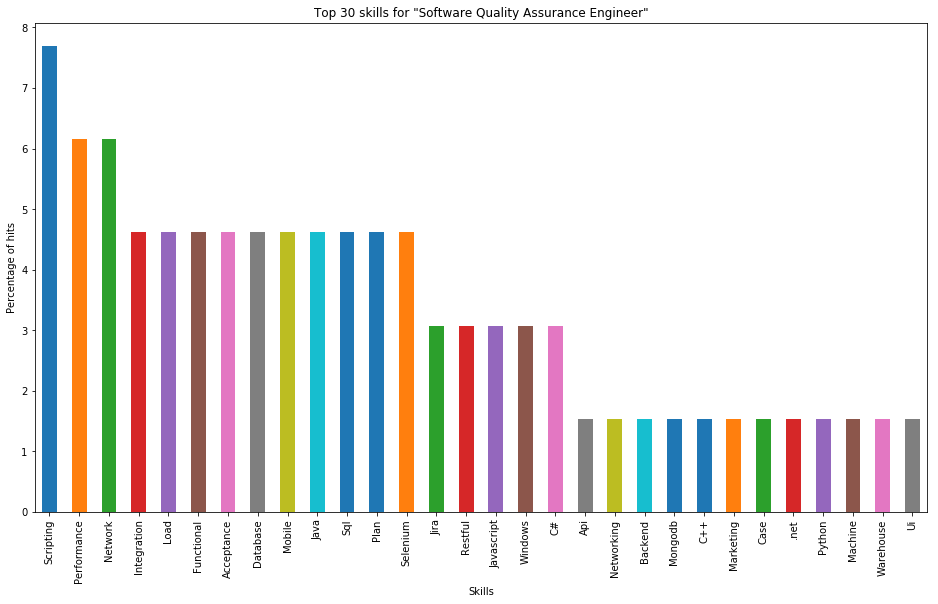

In [5]:
# Top 30 skills for Software Quality Assurance Engineer
sqae = df.iloc[df.index.get_level_values('SearchTerm') == 'software quality assurance engineer'].sum().sort_values(ascending=False).nlargest(30)
sqae_per = sqae*100/sqae.sum()
ax= sqae_per.plot(figsize=(16,9),title='Top 30 skills for "Software Quality Assurance Engineer"', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

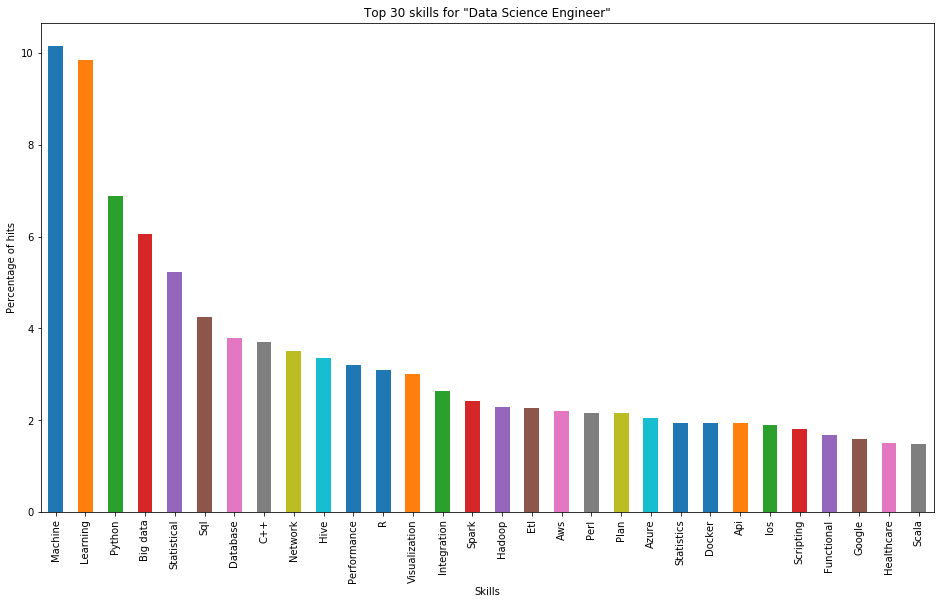

In [6]:
# Top 30 skills for Data Science Engineer
dse = df.iloc[df.index.get_level_values('SearchTerm') == 'data science engineer'].sum().sort_values(ascending=False).nlargest(30)
dse_per = dse*100/dse.sum()
ax= dse_per.plot(figsize=(16,9),title='Top 30 skills for "Data Science Engineer"', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

In [7]:
# Top skills for Software Quality Assurance Engineer in SF Area
# https://stackoverflow.com/questions/53927460/select-rows-in-pandas-multiindex-dataframe
df.sort_index()
sqae_sf = df.loc[pd.IndexSlice[('software quality assurance engineer', 'San Francisco Bay Area')]].sum().sort_values(ascending=False).nlargest(30)
sqae_sf_per = sqae_sf*100/sqae_sf.sum()
ax= sqae_sf_per.plot(figsize=(16,9),title='Top 30 skills for "Software Quality Assurance Engineer" in SF Area', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

KeyError: 'the label [San Francisco Bay Area] is not in the [columns]'

In [ ]:
# Top skills for Software Quality Assurance Engineer in AZ Area
df.sort_index()
sqae_az = df.loc[pd.IndexSlice[('software quality assurance engineer', 'Phoenix, AZ')]].sum().sort_values(ascending=False).nlargest(30)
sqae_az_per = sqae_az*100/sqae_az.sum()
ax= sqae_az_per.plot(figsize=(16,9),title='Top 30 skills for "Software Quality Assurance Engineer" in AZ Area', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

In [ ]:
# Top skills for Data Science Engineer in AZ Area
df.sort_index()
dse_az = df.loc[pd.IndexSlice[('data science engineer', 'Phoenix, AZ')]].sum().sort_values(ascending=False).nlargest(30)
dse_az_per = dse_az*100/dse_az.sum()
ax= dse_az_per.plot(figsize=(16,9),title='Top 30 skills for "Data Science Engineer" in AZ Area', kind='bar')
ax.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

In [ ]:
# Compare the SQAE skills by Geo
df.sort_index()
sqae_az = df.loc[pd.IndexSlice[('software quality assurance engineer', 'Phoenix, AZ')]].sum().sort_values(ascending=False).nlargest(10)
sqae_az_per = sqae_az*100/sqae_az.sum()

sqae_sf = df.loc[pd.IndexSlice[('software quality assurance engineer', 'San Francisco Bay Area')]].sum().sort_values(ascending=False).nlargest(10)
sqae_sf_per = sqae_sf*100/sqae_sf.sum()

sqae_ma = df.loc[pd.IndexSlice[('software quality assurance engineer', 'Sufolk County, Boston MA')]].sum().sort_values(ascending=False).nlargest(10)
sqae_ma_per = sqae_ma*100/sqae_ma.sum()

sqae_tx = df.loc[pd.IndexSlice[('software quality assurance engineer', 'Travis County, Austin TX')]].sum().sort_values(ascending=False).nlargest(10)
sqae_tx_per = sqae_tx*100/sqae_tx.sum()

In [ ]:
# Plot of the skill requirement for software quality assurance engineer across geos
df_sqae_cp = pd.concat([sqae_sf_per, sqae_az_per, sqae_ma_per], ignore_index=False, sort=True, axis = 1)
df_sqae_cp.columns = ['San Francisco', 'Arizona', 'Boston']
df_sqae_cp= df_sqae_cp.replace(0,None)
df_sqae_cp=df_sqae_cp.dropna(how='all',axis=0)
df_sqae_cp.fillna(0, inplace=True)
xy = df_sqae_cp.plot(figsize=(20,10), kind='bar', title='Comparison of top 10 skills for "Software Quality Assurance Engineer" across geos', grid=False, width=0.8)
xy.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()

In [ ]:
# Compare the DSE skills by Geo
df.sort_index()
dse_az = df.loc[pd.IndexSlice[('data science engineer', 'Phoenix, AZ')]].sum().sort_values(ascending=False).nlargest(10)
dse_az_per = dse_az*100/dse_az.sum()

dse_sf = df.loc[pd.IndexSlice[('data science engineer', 'San Francisco Bay Area')]].sum().sort_values(ascending=False).nlargest(10)
dse_sf_per = dse_sf*100/dse_sf.sum()

dse_ma = df.loc[pd.IndexSlice[('data science engineer', 'Sufolk County, Boston MA')]].sum().sort_values(ascending=False).nlargest(10)
dse_ma_per = dse_ma*100/dse_ma.sum()

dse_tx = df.loc[pd.IndexSlice[('data science engineer', 'Travis County, Austin TX')]].sum().sort_values(ascending=False).nlargest(10)
dse_tx_per = dse_tx*100/dse_tx.sum()

In [ ]:
# Plot of the skill requirement for data science engineer across geos
df_dse_cp = pd.concat([dse_sf_per, dse_az_per, dse_tx_per], ignore_index=False, sort=True, axis = 1)
df_dse_cp.columns = ['San Francisco', 'Arizona', 'Austin']
df_dse_cp= df_dse_cp.replace(0,None)
df_dse_cp=df_dse_cp.dropna(how='all',axis=0)
df_dse_cp.fillna(0, inplace=True)
xy = df_dse_cp.plot(figsize=(20,10), kind='bar', title='Comparison of top 10 skills for "Data Science Engineer" across geos', grid=False, width=0.8)
xy.set(xlabel='Skills',ylabel='Percentage of hits')
plt.show()